In [1]:
import openpyxl
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib

# Reading the Ground Truth:

In [2]:
# Open the Excel file
wb = openpyxl.load_workbook('qualtrics-mapping.xlsx')

# Select the sheet to read data from
sheet = wb['Design']

# Get the maximum number of rows in the sheet
max_row = sheet.max_row

# Define the column to read data from
vulnerability_name_column = 1
vulnerability_type_column = 2

arja_column = 15
card_column = 16
jgen_column = 17
jkali_column = 18
rsrepair_column = 19
tbar_column = 20
seqtrans_column = 21

target_columns = [arja_column, card_column, jgen_column, jkali_column, rsrepair_column, tbar_column, seqtrans_column]

ground_truth = {}

for i in [4, 5, 8, 12, 14, 15, 16]:
    vulnerability_name = sheet.cell(row=i, column=vulnerability_name_column).value
    vulnerability_type = sheet.cell(row=i, column=vulnerability_type_column).value

    ground_truth[vulnerability_name] = {
        "type": vulnerability_type,
    }

    for column in target_columns:
        cell_data = sheet.cell(row=i, column=column).value
        if cell_data != None:
            patch_and_answer = cell_data.split("-")
            answer = patch_and_answer[1].strip()
            comparable_answer = None

            if answer == "C":
                comparable_answer = "Correct"
            elif answer == "PC":
                comparable_answer = "Partially Correct"
            else:
                comparable_answer = "Wrong"

            ground_truth[vulnerability_name][patch_and_answer[0].strip()] = comparable_answer

print(ground_truth)

{'CVE-2018-1192': {'type': 'Information Disclosure', 'patch1': 'Correct', 'patch2': 'Wrong', 'patch3': 'Partially Correct', 'patch4': 'Correct', 'patch5': 'Wrong'}, 'CVE-2019-10173': {'type': 'Serialization', 'patch5': 'Partially Correct', 'patch1': 'Wrong', 'patch2': 'Correct', 'patch3': 'Partially Correct', 'patch4': 'Wrong'}, 'CVE-2016-9878': {'type': 'Path', 'patch4': 'Wrong', 'patch5': 'Wrong', 'patch1': 'Wrong', 'patch2': 'Wrong', 'patch3': 'Wrong'}, 'CVE-2018-1324': {'type': 'DoS', 'patch3': 'Correct', 'patch4': 'Correct', 'patch5': 'Correct', 'patch1': 'Wrong', 'patch2': 'Wrong'}, 'CVE-2013-4378': {'type': 'XSS', 'patch4': 'Partially Correct', 'patch1': 'Partially Correct', 'patch2': 'Partially Correct', 'patch3': 'Correct'}, 'CVE-2018-17202': {'type': 'DoS', 'patch2': 'Partially Correct', 'patch3': 'Partially Correct', 'patch4': 'Partially Correct', 'patch5': 'Partially Correct', 'patch1': 'Wrong'}, 'CVE-2018-1000864': {'type': 'DoS', 'patch1': 'Wrong', 'patch2': 'Wrong', 'pat

# First part of the experiment

In [3]:
# Open the Excel file
wb = openpyxl.load_workbook('2023 - E3- Fixing Vulnerabilities with APR Experiment_February 23, 2023_13.14.xlsx')

# Select the sheet to read data from
sheet = wb['Sheet0']

# Get the maximum number of rows in the sheet
max_row = sheet.max_row

vulnerability_based_results = {}
vulnerability_column_ranges = {
    'CVE-2018-1192': range(23,28),
    'CVE-2019-10173': range(31,36),
    'CVE-2016-9878': range(39,44),
    'CVE-2018-1324': range(47,52),
    'CVE-2013-4378': range(55,59),
    'CVE-2018-17202': range(62,67),
    'CVE-2018-1000864': range(70,75)
}
column_start = 23
for vul in ground_truth.keys():
    vulnerability_based_results[vul] = {
        "true_positives": 0,
        "false_positives": 0,
        "true_negatives": 0,
        "false_negatives": 0
    }
    # vulnerability_column_ranges[vul] = range(column_start, column_start + 5)
    # column_start = column_start + 8

for i in range(3, max_row + 1):

    for vulnerability in ground_truth.keys():
        # for CVE-2018-1192 - patches are in order from 1 to 5 in columns
        columns = enumerate(vulnerability_column_ranges[vulnerability])
        vulnerability_name = vulnerability
        for index, column in columns:
            patch = 'patch' + str(index + 1)
            student_answer = sheet.cell(row=i, column=column).value
            if (student_answer == "Correct" or student_answer == "Partially Correct") and (
                    ground_truth[vulnerability_name][patch] == "Correct" or ground_truth[vulnerability_name][
                patch] == "Partially Correct"):
                vulnerability_based_results[vulnerability_name]["true_positives"] += 1
            if (student_answer == "Wrong" or student_answer == "Partially Wrong") and ground_truth[vulnerability_name][
                patch] == "Wrong":
                vulnerability_based_results[vulnerability_name]["true_negatives"] += 1
            if (student_answer == "Wrong" or student_answer == "Partially Wrong") and (
                    ground_truth[vulnerability_name][patch] == "Correct" or ground_truth[vulnerability_name][
                patch] == "Partially Correct"):
                vulnerability_based_results[vulnerability_name]["false_positives"] += 1
            if (student_answer == "Correct" or student_answer == "Partially Correct") and ground_truth[vulnerability_name][patch] == "Wrong":
                vulnerability_based_results[vulnerability_name]["false_negatives"] += 1

print(vulnerability_based_results)

{'CVE-2018-1192': {'true_positives': 63, 'false_positives': 180, 'true_negatives': 103, 'false_negatives': 59}, 'CVE-2019-10173': {'true_positives': 77, 'false_positives': 166, 'true_negatives': 114, 'false_negatives': 48}, 'CVE-2016-9878': {'true_positives': 0, 'false_positives': 0, 'true_negatives': 280, 'false_negatives': 125}, 'CVE-2018-1324': {'true_positives': 110, 'false_positives': 133, 'true_negatives': 124, 'false_negatives': 38}, 'CVE-2013-4378': {'true_positives': 135, 'false_positives': 189, 'true_negatives': 0, 'false_negatives': 0}, 'CVE-2018-17202': {'true_positives': 64, 'false_positives': 260, 'true_negatives': 35, 'false_negatives': 46}, 'CVE-2018-1000864': {'true_positives': 0, 'false_positives': 0, 'true_negatives': 276, 'false_negatives': 129}}


In [4]:
vulnerability_based_results_1 = {}
for vul in ground_truth.keys():
    vulnerability_based_results_1[vul] = {
        "true_positives": 0,
        "false_positives": 0,
        "true_negatives": 0,
        "false_negatives": 0
    }

for i in range(3, max_row + 1):

    for vulnerability in ground_truth.keys():
        # for CVE-2018-1192 - patches are in order from 1 to 5 in columns
        columns = enumerate(vulnerability_column_ranges[vulnerability])
        vulnerability_name = vulnerability

        for index, column in columns:
            patch = 'patch' + str(index + 1)
            student_answer = sheet.cell(row=i, column=column).value
            if (student_answer == "Correct") and (ground_truth[vulnerability_name][patch] == "Correct"):
                vulnerability_based_results_1[vulnerability_name]["true_positives"] += 1
            if (student_answer != "Correct") and ground_truth[vulnerability_name][patch] == student_answer:
                vulnerability_based_results_1[vulnerability_name]["true_negatives"] += 1
            if (student_answer == "Partially Wrong") and ground_truth[vulnerability_name][patch] == "Wrong":
                vulnerability_based_results_1[vulnerability_name]["true_negatives"] += 1
            if (student_answer != "Correct") and (ground_truth[vulnerability_name][patch] == "Correct"):
                vulnerability_based_results_1[vulnerability_name]["false_positives"] += 1
            if (student_answer == "Correct") and (ground_truth[vulnerability_name][patch] != "Correct"):
                vulnerability_based_results_1[vulnerability_name]["false_negatives"] += 1
            if (student_answer == "Partially Correct" or student_answer == "Wrong") and (ground_truth[vulnerability_name][patch] != student_answer) and (
                    ground_truth[vulnerability_name][patch] == "Partially Correct" or ground_truth[vulnerability_name][patch] == "Wrong"):
                vulnerability_based_results_1[vulnerability_name]["false_negatives"] += 1
            if (student_answer == "Partially Wrong") and ground_truth[vulnerability_name][patch] == "Partially Correct":
                vulnerability_based_results_1[vulnerability_name]["false_negatives"] += 1

print(vulnerability_based_results_1)

{'CVE-2018-1192': {'true_positives': 22, 'false_positives': 140, 'true_negatives': 119, 'false_negatives': 124}, 'CVE-2019-10173': {'true_positives': 18, 'false_positives': 63, 'true_negatives': 140, 'false_negatives': 184}, 'CVE-2016-9878': {'true_positives': 0, 'false_positives': 0, 'true_negatives': 280, 'false_negatives': 125}, 'CVE-2018-1324': {'true_positives': 53, 'false_positives': 190, 'true_negatives': 124, 'false_negatives': 38}, 'CVE-2013-4378': {'true_positives': 33, 'false_positives': 48, 'true_negatives': 49, 'false_negatives': 194}, 'CVE-2018-17202': {'true_positives': 0, 'false_positives': 0, 'true_negatives': 85, 'false_negatives': 320}, 'CVE-2018-1000864': {'true_positives': 0, 'false_positives': 0, 'true_negatives': 276, 'false_negatives': 129}}


In [5]:
student_based_results = {}

column_start = 23

response_id_column = 7
student_name_column = 14

for vul in ground_truth.keys():
    vulnerability_column_ranges[vul] = range(column_start, column_start + 5)
    column_start = column_start + 8

for i in range(3, max_row + 1):

    student_name = sheet.cell(row=i, column=student_name_column).value
    response_id = sheet.cell(row=i, column=response_id_column).value
    student_based_results[response_id] = {
        "student_name": student_name,
        "true_positives": 0,
        "false_positives": 0,
        "true_negatives": 0,
        "false_negatives": 0
    }
    for vulnerability in ground_truth.keys():
        # for CVE-2018-1192 - patches are in order from 1 to 5 in columns
        columns = enumerate(vulnerability_column_ranges[vul])
        vulnerability_name = vulnerability

        for index, column in columns:
            patch = 'patch' + str(index + 1)
            student_answer = sheet.cell(row=i, column=column).value
            if (student_answer == "Correct" or student_answer == "Partially Correct") and (
                    ground_truth[vulnerability_name][patch] == "Correct" or ground_truth[vulnerability_name][
                patch] == "Partially Correct"):
                student_based_results[response_id]["true_positives"] += 1
            if (student_answer == "Wrong" or student_answer == "Partially Wrong") and ground_truth[vulnerability_name][
                patch] == "Wrong":
                student_based_results[response_id]["true_negatives"] += 1
            if (student_answer == "Wrong" or student_answer == "Partially Wrong") and (
                    ground_truth[vulnerability_name][patch] == "Correct" or ground_truth[vulnerability_name][
                patch] == "Partially Correct"):
                student_based_results[response_id]["false_positives"] += 1
            if (student_answer == "Correct" or student_answer == "Partially Correct") and ground_truth[vulnerability_name][patch] == "Wrong":
                student_based_results[response_id]["false_negatives"] += 1

print(student_based_results)
print(len(student_based_results.keys()))

{'R_33vBJmhqb4nwqC0': {'student_name': 'Bajpai', 'true_positives': 12, 'false_positives': 2, 'true_negatives': 5, 'false_negatives': 9}, 'R_27IKipvaEVWoOI3': {'student_name': 'Athreya', 'true_positives': 3, 'false_positives': 11, 'true_negatives': 10, 'false_negatives': 4}, 'R_2dEiqN4UIQw4ZD2': {'student_name': 'Duits', 'true_positives': 2, 'false_positives': 12, 'true_negatives': 9, 'false_negatives': 5}, 'R_1eyMYMVQNIoBDb7': {'student_name': 'Teuthof', 'true_positives': 4, 'false_positives': 10, 'true_negatives': 11, 'false_negatives': 3}, 'R_2QM35MJygP3g0FT': {'student_name': 'Nadif', 'true_positives': 8, 'false_positives': 6, 'true_negatives': 8, 'false_negatives': 6}, 'R_3hzMt4Y843ABlbq': {'student_name': 'van Kemenade', 'true_positives': 3, 'false_positives': 11, 'true_negatives': 10, 'false_negatives': 4}, 'R_r6jvNMEQ9PTxxvP': {'student_name': 'Qutabzada', 'true_positives': 7, 'false_positives': 7, 'true_negatives': 7, 'false_negatives': 7}, 'R_3KOAVDS3lWxhIJy': {'student_name':

In [6]:
def recall(tp, fn):
    """
    Calculates the recall given true positives and false negatives.
    """
    # if tp + fn == 0:
    #     return 0
    return tp / (tp + fn + 1e-6)


def precision(tp, fp):
    """
    Calculate precision given true positives and false positives
    """
    if tp + fp == 0:
        return 0
    else:
        return tp / (tp + fp)


def accuracy(tp, fp, tn, fn):
    """
    Calculate accuracy given true positives, false positives, true negatives and false negatives
    """
    return (tp + tn) / (tp + fp + tn + fn)

def f1_score(precision, recall):
    """
    Calculate f1 score given precision and recall
    """
    return 2*(precision * recall) / (precision + recall + 1e-6)

In [7]:
def render_column_chart(lables, values, method):
    plt.bar(lables, values)
    for i in range(len(lables)):
        plt.text(i, values[i] + 0.001, '{0:.2f}'.format(values[i]), ha='center')
    plt.xticks(rotation=90)
    plt.ylabel(f'{method} value')
    plt.title(f"{method} values of vulnerabilities based on students answers")
    plt.tight_layout()
    plt.savefig(f'images/vul_{method}.png')
    plt.show()

In [8]:
def box_chart(array1, array2, array3, labels, xaxis_title, yaxis_title, title):

    # Calculate the mean and median of each array
    mean1 = np.mean(array1)
    mean2 = np.mean(array2)
    mean3 = np.mean(array3)

    print(f"array1 mean = {mean1}")
    print(f"array2 mean = {mean2}")
    print(f"array2 mean = {mean3}")

    # Create a side-by-side box plot
    plt.boxplot([array1, array2, array3])
    plt.xticks([1, 2, 3], labels)
    plt.xlabel(xaxis_title)
    plt.ylabel(yaxis_title)
    plt.title(title)

    # Add mean markers to the plot
    plt.plot([1, 2, 3], [mean1, mean2, mean3], marker='o', color='red', linestyle='None')

    plt.text(1, mean1 + 0.1, '{0:.2f}'.format(mean1), ha='center')
    plt.text(2, mean2 + 0.1, '{0:.2f}'.format(mean2), ha='center')
    plt.text(3, mean3 + 0.2, '{0:.2f}'.format(mean3), ha='center')

    plt.legend(handles=[plt.Line2D([], [], color="white", marker='o', markerfacecolor="red", label='Mean'), plt.Line2D([0], [0], marker='_', color='orange', linestyle='None', label='Median')])

    plt.tight_layout()
    plt.savefig('images/student_boxplot.png')
    plt.show()

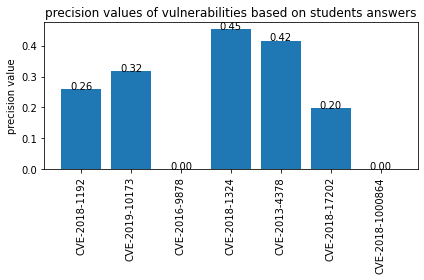

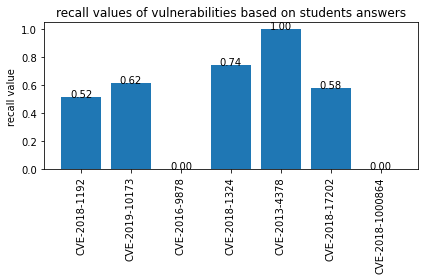

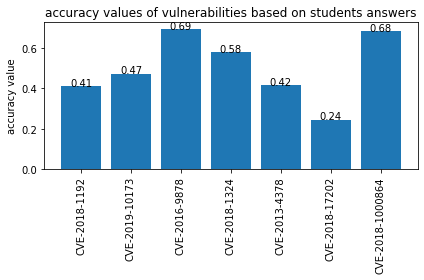

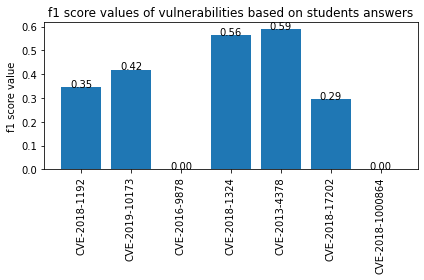

array1 mean = 0.3412698412698412
array2 mean = 0.4012345270009286
array2 mean = 0.5171957671957671


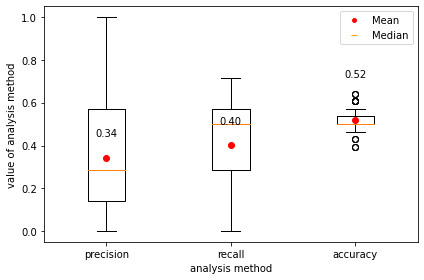

In [9]:
vulnerability_based_precision = {}
vulnerability_based_recall = {}
student_based_precision = {}
student_based_recall = {}
vulnerability_based_accuracy = {}
student_based_accuracy = {}
vulnerability_based_f1 = {}
student_based_f1 = {}
student_correctness = {}

for vul in vulnerability_based_results.keys():
    vulnerability_based_precision[vul] = precision(vulnerability_based_results[vul]["true_positives"],
                                                   vulnerability_based_results[vul]["false_positives"])
    vulnerability_based_recall[vul] = recall(vulnerability_based_results[vul]["true_positives"],
                                             vulnerability_based_results[vul]["false_negatives"])
    vulnerability_based_accuracy[vul] = accuracy(vulnerability_based_results[vul]["true_positives"],
                                                 vulnerability_based_results[vul]["false_positives"],
                                                 vulnerability_based_results[vul]["true_negatives"],
                                                 vulnerability_based_results[vul]["false_negatives"])
    vulnerability_based_f1[vul] = f1_score(vulnerability_based_precision[vul], vulnerability_based_recall[vul])

for student in student_based_results.keys():
    student_based_precision[student] = precision(student_based_results[student]["true_positives"],
                                                 student_based_results[student]["false_positives"])
    student_based_recall[student] = recall(student_based_results[student]["true_positives"],
                                           student_based_results[student]["false_negatives"])
    student_based_accuracy[student] = accuracy(student_based_results[student]["true_positives"],
                                               student_based_results[student]["false_positives"],
                                               student_based_results[student]["true_negatives"],
                                               student_based_results[student]["false_negatives"])
    student_based_f1[student] = f1_score(student_based_precision[student], student_based_recall[student])
    student_correctness[student] = student_based_results[student]["true_positives"] + student_based_results[student]["true_negatives"]

# print(vulnerability_based_precision)
# print(vulnerability_based_recall)
# print(student_based_precision)
# print(student_based_recall)
# print(vulnerability_based_accuracy)
# print(student_based_accuracy)

render_column_chart(list(vulnerability_based_precision.keys()),list(vulnerability_based_precision.values()), 'precision')
render_column_chart(list(vulnerability_based_recall.keys()),list(vulnerability_based_recall.values()), 'recall')
render_column_chart(list(vulnerability_based_accuracy.keys()),list(vulnerability_based_accuracy.values()), 'accuracy')
render_column_chart(list(vulnerability_based_f1.keys()),list(vulnerability_based_f1.values()), 'f1 score')

box_chart(list(student_based_precision.values()), list(student_based_recall.values()), list(student_based_accuracy.values()), ["precision", "recall", "accuracy"], "analysis method", "value of analysis method", "")



In [10]:
# pd.DataFrame.from_dict(student_based_precision)
df = pd.DataFrame([{'id':k, 'precision':v} for k, v in student_based_precision.items()])
df_recall = pd.DataFrame([{'id':k, 'recall':v} for k, v in student_based_recall.items()])
df_accuracy = pd.DataFrame([{'id':k, 'accuracy':v} for k, v in student_based_accuracy.items()])
df_f1 = pd.DataFrame([{'id':k, 'f1':v} for k, v in student_based_f1.items()])
df_correct = pd.DataFrame([{'id':k, 'correct':v} for k, v in student_correctness.items()])

df = df.merge(df_recall, left_on='id', right_on='id')
df = df.merge(df_accuracy, left_on='id', right_on='id')
df = df.merge(df_f1, left_on='id', right_on='id')
df

,id,precision,recall,accuracy,f1
0,R_33vBJmhqb4nwqC0,0.857143,0.571429,0.607143,0.685714
1,R_27IKipvaEVWoOI3,0.214286,0.428571,0.464286,0.285714
2,R_2dEiqN4UIQw4ZD2,0.142857,0.285714,0.392857,0.190476
3,R_1eyMYMVQNIoBDb7,0.285714,0.571428,0.535714,0.380952
4,R_2QM35MJygP3g0FT,0.571429,0.571429,0.571429,0.571428
...,...,...,...,...,...
76,R_1lrZ6I21Xq7epo7,0.285714,0.571428,0.535714,0.380952
77,R_120hQwTfvKjk84I,0.285714,0.571428,0.535714,0.380952
78,R_b2ZcG4HkCrQl4nD,0.285714,0.571428,0.535714,0.380952
79,R_306Q1eXXb2wDX03,0.571429,0.571429,0.571429,0.571428


In [11]:
df_accuracy = pd.DataFrame([{'id':k, 'accuracy':v} for k, v in vulnerability_based_accuracy.items()])
print(f"Vulner-wise: mean: {df_accuracy['accuracy'].mean()}, std:{df_accuracy['accuracy'].std()}, geo-mean: {np.exp(np.log(df_accuracy.accuracy).mean())}")
print(f"Subject-wise: mean: {df['accuracy'].mean()}, std:{df['accuracy'].std()}, geo-mean: {np.exp(np.log(df.accuracy).mean())}")

Vulner-wise: mean: 0.4990299823633157, std:0.16164664205458892, geo-mean: 0.4737926508498208
Subject-wise: mean: 0.5171957671957671, std:0.05390110201272271, geo-mean: 0.5144136237353275


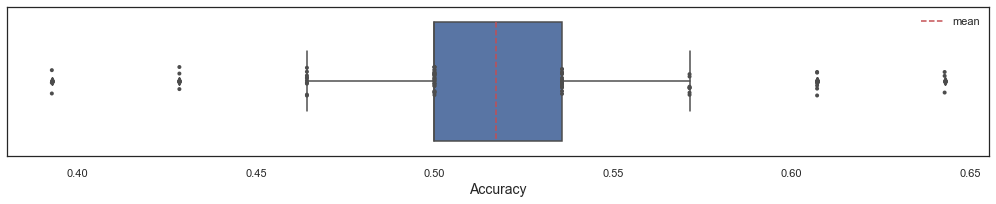

In [12]:
plt.style.use('seaborn')
sns.set(style="white")

plt.figure(figsize=(14, 3))
sns.boxplot(data=df[['accuracy']], x="accuracy")

# Add in points to show each observation
sns.stripplot(data=df[['accuracy']], x="accuracy",
              size=4, color=".3", linewidth=0)
plt.vlines(df[['accuracy']].mean(), -0.4, 0.4, 'r', '--', label='mean')
plt.legend()
plt.xlabel('Accuracy', fontsize=14)
plt.tight_layout()
plt.savefig('images/student_accuracy.png')
plt.show()

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_9688\978643575.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.vlines(df_correct.mean(), -0.4, 0.4, 'r', '--', label='mean')


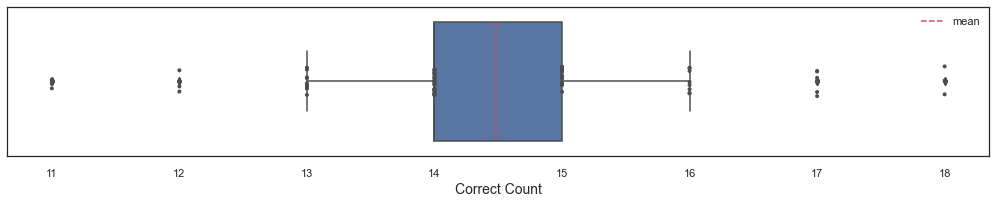

In [13]:
plt.figure(figsize=(14, 3))
sns.boxplot(data=df_correct, x="correct")

# Add in points to show each observation
sns.stripplot(data=df_correct, x="correct",
              size=4, color=".3", linewidth=0)
plt.xlabel('Correct Count', fontsize=14)
plt.vlines(df_correct.mean(), -0.4, 0.4, 'r', '--', label='mean')
plt.legend()
# plt.plot(df_correct.mean(), marker='o', color='red', linestyle='None')
plt.tight_layout()
plt.savefig('images/student_correctness.png')
plt.show()

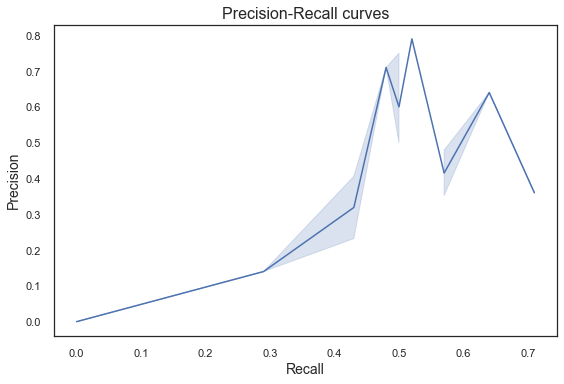

In [14]:
sns.set(style="white")
plt.title('Precision-Recall curves', fontsize=16)
# plt.legend(loc = 'lower right')
sns.lineplot(data=np.round(df,decimals=2), x='recall', y='precision')
plt.ylabel('Precision', fontsize=14)
plt.xlabel('Recall', fontsize=14)
plt.tight_layout()
plt.savefig('images/PPC.png')
plt.show()

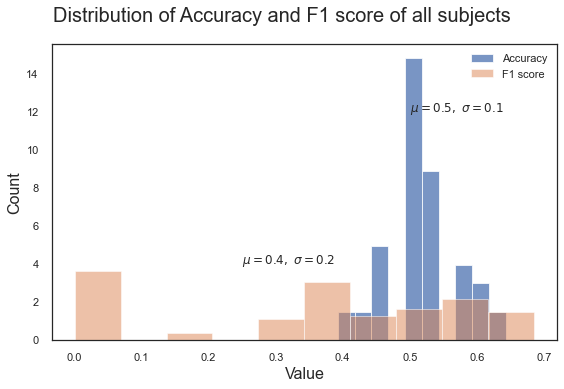

In [15]:
# # fig = plt.figure(figsize= (20, 10))
# ax = fig.add_subplot(111)

plt.hist(df['accuracy'], label='Accuracy', density= True, alpha=0.75)
plt.hist(df['f1'], label='F1 score', density= True, alpha=0.5)
plt.legend()
plt.suptitle("Distribution of Accuracy and F1 score of all subjects", fontsize= 20)
plt.xlabel("Value", fontsize= 16)
plt.ylabel("Count", fontsize= 16)

# plt.text(0.75, 2.525,
#          f"$\mu= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].mean(): .1f}, \ \sigma= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].std(): .1f}$")
plt.text(0.25, 4,
         f"$\mu= {df['f1'].mean(): .1f}, \ \sigma= {df['f1'].std(): .1f}$")
plt.text(0.5, 12,
         f"$\mu= {df['accuracy'].mean(): .1f}, \ \sigma= {df['accuracy'].std(): .1f}$")
plt.tight_layout()
plt.savefig('images/hist.png')
plt.show()

# Second part of experiment:

In [16]:
vul_student_change_mind = {}
vul_student_change_mind_columns = {}
vul_student_final_choice_columns = {
    'CVE-2018-1192': 28,
    'CVE-2019-10173': 36,
    'CVE-2016-9878': 44,
    'CVE-2018-1324': 52,
    'CVE-2013-4378': 59,
    'CVE-2018-17202': 67,
    'CVE-2018-1000864': 75
}

student_original_evaluation = {
    'CVE-2018-1192': {},
    'CVE-2019-10173': {},
    'CVE-2016-9878': {},
    'CVE-2018-1324': {},
    'CVE-2013-4378': {},
    'CVE-2018-17202': {},
    'CVE-2018-1000864': {}
}

student_final_evaluation = {
    'CVE-2018-1192': {},
    'CVE-2019-10173': {},
    'CVE-2016-9878': {},
    'CVE-2018-1324': {},
    'CVE-2013-4378': {},
    'CVE-2018-17202': {},
    'CVE-2018-1000864': {}
}

correctness_point_mapper = {
    "Correct": 2,
    "Partially Correct": 1,
    "Wrong": 0
}

column_start = 79

for vul in ground_truth.keys():
    vul_student_change_mind_columns[vul] = range(column_start, column_start + 2)
    column_start = column_start + 2

    vul_student_change_mind[vul] = {
        "generic": {
            "insist": 0,
            "follow": 0,
            "change": 0
        },
        "security": {
            "insist": 0,
            "follow": 0,
            "change": 0
        }
    }

for vul in ground_truth.keys():
    student_final_evaluation[vul] = {
        "generic": {},
        "security": {}
    }

print(vul_student_change_mind_columns)

for i in range(3, max_row + 1):

    for vul in ground_truth.keys():

        columns = enumerate(vul_student_change_mind_columns[vul])
        student_final_patch_choice_current_vul = sheet.cell(row=i, column=vul_student_final_choice_columns[vul]).value

        for index, column in columns:
            cell_data = sheet.cell(row=i, column=column).value

            if cell_data != '':
                cell_splitted = cell_data.split("-")
                patch_part = cell_splitted[0].strip()
                securiy_choice_made = None

                if len(cell_splitted) == 2:
                    securiy_choice_made = True
                else:
                    securiy_choice_made = False

                target_group = None
                if index == 0:
                    #vul_student_change_mind[vul]["generic"]
                    target_group = "generic"
                else:
                    target_group = "security"

                if patch_part == student_final_patch_choice_current_vul:
                    vul_student_change_mind[vul][target_group]['insist'] += 1
                if patch_part != student_final_patch_choice_current_vul:
                    if securiy_choice_made == True:
                        vul_student_change_mind[vul][target_group]['follow'] += 1
                    else:
                        vul_student_change_mind[vul][target_group]['change'] += 1

                response_id = sheet.cell(row=i, column=response_id_column).value

                student_original_evaluation[vul][response_id] = correctness_point_mapper[ground_truth[vul][student_final_patch_choice_current_vul.replace(' ', '').lower()]]
                student_final_evaluation[vul][target_group][response_id] = correctness_point_mapper[ground_truth[vul][patch_part.replace(' ', '').lower()]]

print(vul_student_change_mind)
# print(student_final_evaluation)

{'CVE-2018-1192': range(79, 81), 'CVE-2019-10173': range(81, 83), 'CVE-2016-9878': range(83, 85), 'CVE-2018-1324': range(85, 87), 'CVE-2013-4378': range(87, 89), 'CVE-2018-17202': range(89, 91), 'CVE-2018-1000864': range(91, 93)}
{'CVE-2018-1192': {'generic': {'insist': 28, 'follow': 11, 'change': 1}, 'security': {'insist': 29, 'follow': 12, 'change': 0}}, 'CVE-2019-10173': {'generic': {'insist': 22, 'follow': 19, 'change': 1}, 'security': {'insist': 25, 'follow': 12, 'change': 2}}, 'CVE-2016-9878': {'generic': {'insist': 25, 'follow': 16, 'change': 0}, 'security': {'insist': 24, 'follow': 15, 'change': 1}}, 'CVE-2018-1324': {'generic': {'insist': 27, 'follow': 11, 'change': 2}, 'security': {'insist': 31, 'follow': 8, 'change': 2}}, 'CVE-2013-4378': {'generic': {'insist': 29, 'follow': 10, 'change': 1}, 'security': {'insist': 25, 'follow': 16, 'change': 0}}, 'CVE-2018-17202': {'generic': {'insist': 33, 'follow': 7, 'change': 0}, 'security': {'insist': 21, 'follow': 17, 'change': 3}}, '

Perception of students of usability of tools

{'CVE-2018-1192': {'generic': 0.7, 'security': 0.7073170731707317}, 'CVE-2019-10173': {'generic': 0.5238095238095238, 'security': 0.6410256410256411}, 'CVE-2016-9878': {'generic': 0.6097560975609756, 'security': 0.6}, 'CVE-2018-1324': {'generic': 0.675, 'security': 0.7560975609756098}, 'CVE-2013-4378': {'generic': 0.725, 'security': 0.6097560975609756}, 'CVE-2018-17202': {'generic': 0.825, 'security': 0.5121951219512195}, 'CVE-2018-1000864': {'generic': 0.775, 'security': 0.6829268292682927}}
generic average 0.6905093744815
security average 0.6441883319932101


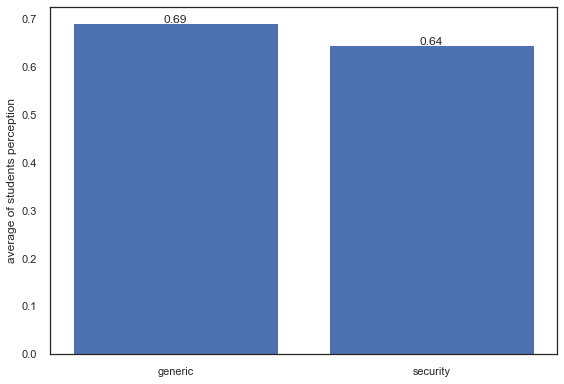

In [32]:
tool_usefullness = {}
for vul, obj in vul_student_change_mind.items():
    tool_usefullness[vul] = {
        "generic": vul_student_change_mind[vul]["generic"]["insist"] / (
                vul_student_change_mind[vul]["generic"]["insist"] + vul_student_change_mind[vul]["generic"][
            "follow"] + vul_student_change_mind[vul]["generic"]["change"]),
        "security": vul_student_change_mind[vul]["security"]["insist"] / (
                vul_student_change_mind[vul]["security"]["insist"] + vul_student_change_mind[vul]["security"][
            "follow"] + vul_student_change_mind[vul]["security"]["change"])
    }

print(tool_usefullness)

generic_sum = 0
security_sum = 0
for obj in tool_usefullness.values():
    generic_sum += obj["generic"]
    security_sum += obj["security"]

print(f"generic average", generic_sum / len(tool_usefullness.keys()))
print(f"security average", security_sum / len(tool_usefullness.keys()))

values = [generic_sum / len(tool_usefullness.keys()), security_sum / len(tool_usefullness.keys())]
lables = ["generic", "security"]

plt.bar(lables, values)
for i in range(len(lables)):
    plt.text(i, values[i] + 0.001, '{0:.2f}'.format(values[i]), ha='center')
plt.ylabel("average of students perception")
plt.tight_layout()
plt.savefig('images/perception_average.png')
plt.show()

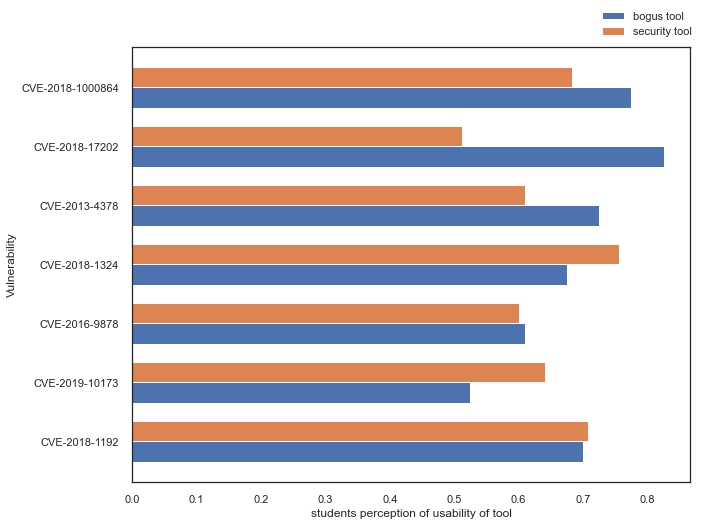

In [33]:
import matplotlib.pyplot as plt

cves = list(tool_usefullness.keys())
generic_values = [tool_usefullness[cve]['generic'] for cve in cves]
security_values = [tool_usefullness[cve]['security'] for cve in cves]

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35
ax.barh([i - bar_width / 2 for i in range(len(cves))], generic_values, bar_width, label='bogus tool')
ax.barh([i + bar_width / 2 for i in range(len(cves))], security_values, bar_width, label='security tool')

ax.set_yticks(range(len(cves)))
ax.set_yticklabels(cves)
ax.legend(loc='lower right', bbox_to_anchor=(1.02, 1))

ax.set_xlabel('students perception of usability of tool')
ax.set_ylabel('Vulnerability')

plt.savefig('images/perception.png')
plt.show()

In [49]:
stats.ttest_ind(generic_values, security_values)

Ttest_indResult(statistic=0.9510288366424167, pvalue=0.36035234450100484)

In [17]:
df_part2_original = pd.DataFrame([{'vulnerability':k, 'id':v1, 'original_score':v2} for k, v in student_original_evaluation.items() for v1, v2 in v.items()])
df_part2_final = pd.DataFrame([{'vulnerability':k, 'group':k1, 'id':k2, 'final_score':v2} for k, v in student_final_evaluation.items() for k1, v1 in v.items() for k2, v2 in v1.items()])
df_part2 = pd.merge(df_part2_original, df_part2_final, on=['vulnerability','id'])
df_part2['influential_ratio'] = df_part2['final_score'] - df_part2['original_score']
df_part2.head()

,vulnerability,id,original_score,group,final_score,influential_ratio
0,CVE-2018-1192,R_33vBJmhqb4nwqC0,1,security,0,-1
1,CVE-2018-1192,R_27IKipvaEVWoOI3,0,generic,0,0
2,CVE-2018-1192,R_2dEiqN4UIQw4ZD2,0,security,0,0
3,CVE-2018-1192,R_1eyMYMVQNIoBDb7,0,generic,0,0
4,CVE-2018-1192,R_2QM35MJygP3g0FT,1,security,1,0


In [34]:
def ttest(data_a, data_b):
    group_a = list(data_a)
    group_b = list(data_b)

    # Calculate t-value and p-value
    t, p = stats.ttest_ind(group_a, group_b)

    return '{0:.6f}'.format(t), '{0:.6f}'.format(p)

In [35]:
vul_grouped = df_part2.groupby('vulnerability')
vul_grouped_dataframes = [(group, _) for _, group in vul_grouped]

for i, (group, vul) in enumerate(vul_grouped_dataframes):
    print(f"{vul}:")
    grouped = group.groupby('group')
    gen_sec_grouped = [group for _, group in grouped]
    generic_final_score = None
    security_final_score = None
    generic_influential_ratio = None
    security_influential_ratio = None
    for j, gen_sec_group in enumerate(gen_sec_grouped):
        if j == 0:
            generic_final_score = gen_sec_group["final_score"]
            generic_influential_ratio = gen_sec_group["influential_ratio"]
        else:
            security_final_score = gen_sec_group["final_score"]
            security_influential_ratio = gen_sec_group["influential_ratio"]

    t_final_score, p_final_score = ttest(generic_final_score, security_final_score)
    t_influential_ratio, p_influential_ratio = ttest(generic_influential_ratio, security_influential_ratio)
    print(f"Final Score: t value = {t_final_score} - p value = {p_final_score}")
    print(f"Finfluential ratio: t value = {t_influential_ratio} - p value = {p_influential_ratio}")

CVE-2013-4378:
Final Score: t value = 4.077089 - p value = 0.000108
Finfluential ratio: t value = 4.954500 - p value = 0.000004
CVE-2016-9878:
Final Score: t value = nan - p value = nan
Finfluential ratio: t value = nan - p value = nan
CVE-2018-1000864:
Final Score: t value = nan - p value = nan
Finfluential ratio: t value = nan - p value = nan
CVE-2018-1192:
Final Score: t value = -0.429438 - p value = 0.668773
Finfluential ratio: t value = -0.870598 - p value = 0.386611
CVE-2018-1324:
Final Score: t value = -0.125820 - p value = 0.900194
Finfluential ratio: t value = -0.761782 - p value = 0.448459
CVE-2018-17202:
Final Score: t value = -4.640163 - p value = 0.000014
Finfluential ratio: t value = -4.768372 - p value = 0.000008
CVE-2019-10173:
Final Score: t value = -0.487577 - p value = 0.627200
Finfluential ratio: t value = -1.051912 - p value = 0.296047


In [48]:
vul_grouped_all = df_part2[['group', 'final_score', 'influential_ratio']].groupby('group')
vul_grouped_dataframes_all = [group for _, group in vul_grouped_all]
for j, gen_sec_group in enumerate(vul_grouped_dataframes_all):
    if j == 0:
        generic_final_score = gen_sec_group["final_score"]
        generic_influential_ratio = gen_sec_group["influential_ratio"]
    else:
        security_final_score = gen_sec_group["final_score"]
        security_influential_ratio = gen_sec_group["influential_ratio"]
t_final_score, p_final_score = ttest(generic_final_score, security_final_score)
t_influential_ratio, p_influential_ratio = ttest(generic_influential_ratio, security_influential_ratio)
print(f"Final Score: t value = {t_final_score} - p value = {p_final_score}")
print(f"Finfluential ratio: t value = {t_influential_ratio} - p value = {p_influential_ratio}")

Final Score: t value = -0.578928 - p value = 0.562868
Finfluential ratio: t value = -1.187182 - p value = 0.235655


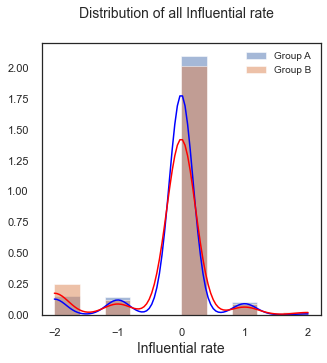

In [18]:
params = {'legend.title_fontsize': 10,
          'legend.fancybox': True,
          'legend.shadow': True,
          'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)

fig = plt.figure(figsize= (5,5))
# ax = fig.add_subplot(111)

plt.hist(df_part2.where(df_part2.group=='security').dropna()['influential_ratio'], label='Group A', density= True, alpha=0.5)
plt.hist(df_part2.where(df_part2.group=='generic').dropna()['influential_ratio'], label='Group B', density= True, alpha=0.5)

plt.legend()
plt.suptitle("Distribution of all Influential rate", fontsize=14)
plt.xlabel("Influential rate", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# plt.text(0.25, 4,
#          f"$\mu= {df['f1'].mean(): .1f}, \ \sigma= {df['f1'].std(): .1f}$")
# plt.text(0.5, 12,
#          f"$\mu= {df['accuracy'].mean(): .1f}, \ \sigma= {df['accuracy'].std(): .1f}$")
kde_sec = stats.gaussian_kde(df_part2.where(df_part2.group=='security').dropna()['influential_ratio'])
kde_gen = stats.gaussian_kde(df_part2.where(df_part2.group=='generic').dropna()['influential_ratio'])

xx = np.linspace(-2, 2, 100)
plt.plot(xx, kde_sec(xx), 'blue')
plt.plot(xx, kde_gen(xx), 'red')

plt.savefig('images/hist_all.png')
plt.show()


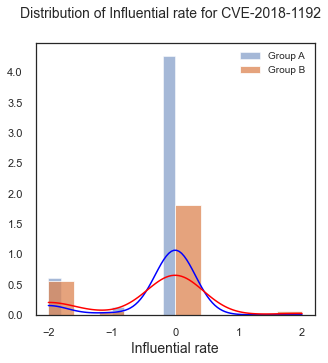

In [19]:
df_1192 = df_part2.where(df_part2.vulnerability=='CVE-2018-1192').dropna()	
fig = plt.figure(figsize= (5,5))
plt.hist(df_1192.where(df_1192.group=='security').dropna()['influential_ratio'], label='Group A', density= True, alpha=0.5)
plt.hist(df_1192.where(df_1192.group=='generic').dropna()['influential_ratio'], label='Group B', density= True, alpha=0.75)

plt.legend()
plt.suptitle("Distribution of Influential rate for CVE-2018-1192", fontsize=14)
plt.xlabel("Influential rate", fontsize=14)
# plt.ylabel("Value", fontsize=14)

kde_sec = stats.gaussian_kde(df_1192.where(df_1192.group=='security').dropna()['influential_ratio'])
kde_gen = stats.gaussian_kde(df_1192.where(df_1192.group=='generic').dropna()['influential_ratio'])

xx = np.linspace(-2, 2, 100)
plt.plot(xx, kde_sec(xx), 'blue')
plt.plot(xx, kde_gen(xx), 'red')

plt.savefig('images/hist_1192.png')
plt.show()

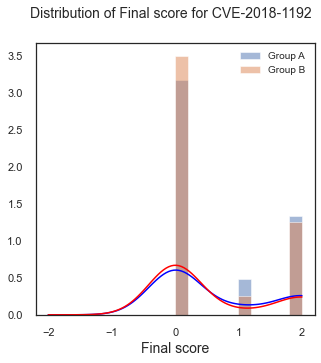

In [20]:
fig = plt.figure(figsize= (5,5))
# ax = fig.add_subplot(111)

plt.hist(df_1192.where(df_1192.group=='security').dropna()['final_score'], label='Group A', density= True, alpha=0.5)
plt.hist(df_1192.where(df_1192.group=='generic').dropna()['final_score'], label='Group B', density= True, alpha=0.5)

plt.legend()
plt.suptitle("Distribution of Final score for CVE-2018-1192", fontsize=14)
plt.xlabel("Final score", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# plt.text(0.25, 4,
#          f"$\mu= {df['f1'].mean(): .1f}, \ \sigma= {df['f1'].std(): .1f}$")
# plt.text(0.5, 12,
#          f"$\mu= {df['accuracy'].mean(): .1f}, \ \sigma= {df['accuracy'].std(): .1f}$")
kde_sec = stats.gaussian_kde(df_1192.where(df_1192.group=='security').dropna()['final_score'])
kde_gen = stats.gaussian_kde(df_1192.where(df_1192.group=='generic').dropna()['final_score'])

xx = np.linspace(-2, 2, 100)
plt.plot(xx, kde_sec(xx), 'blue')
plt.plot(xx, kde_gen(xx), 'red')

plt.savefig('images/hist_10173_final.png')
plt.show()


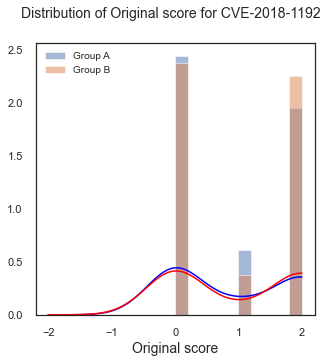

In [21]:
fig = plt.figure(figsize= (5,5))
# ax = fig.add_subplot(111)

plt.hist(df_1192.where(df_1192.group=='security').dropna()['original_score'], label='Group A', density= True, alpha=0.5)
plt.hist(df_1192.where(df_1192.group=='generic').dropna()['original_score'], label='Group B', density= True, alpha=0.5)

plt.legend()
plt.suptitle("Distribution of Original score for CVE-2018-1192", fontsize=14)
plt.xlabel("Original score", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# plt.text(0.25, 4,
#          f"$\mu= {df['f1'].mean(): .1f}, \ \sigma= {df['f1'].std(): .1f}$")
# plt.text(0.5, 12,
#          f"$\mu= {df['accuracy'].mean(): .1f}, \ \sigma= {df['accuracy'].std(): .1f}$")
kde_sec = stats.gaussian_kde(df_1192.where(df_1192.group=='security').dropna()['original_score'])
kde_gen = stats.gaussian_kde(df_1192.where(df_1192.group=='generic').dropna()['original_score'])

xx = np.linspace(-2, 2, 100)
plt.plot(xx, kde_sec(xx), 'blue')
plt.plot(xx, kde_gen(xx), 'red')

plt.savefig('images/hist_10173_original.png')
plt.show()


In [22]:
df_part2[['vulnerability','final_score','id','group']].groupby(['vulnerability','final_score', 'group']).agg('count')

id
vulnerability    final_score group       
CVE-2013-4378    1           generic    8
                             security  25
                 2           generic   32
                             security  16
CVE-2016-9878    0           generic   41
                             security  40
CVE-2018-1000864 0           generic   40
                             security  41
CVE-2018-1192    0           generic   28
                             security  26
                 1           generic    2
                             security   4
                 2           generic   10
                             security  11
CVE-2018-1324    0           generic   23
                             security  23
                 2           generic   17
                             security  18
CVE-2018-17202   0           generic   32
                             security  14
                 1           generic    8
                             security  27
CVE-2019-10173   0           generic   29
                             security  23
                 1           generic    2
                             security   6
                 2           generic   11
                             security  10

In [23]:
df_part2_result = df_part2[['vulnerability','original_score','final_score','group', 'influential_ratio']].groupby(['vulnerability','group']).agg('mean')
df_part2_result = df_part2_result.where(df_part2_result.original_score != 0).dropna().reset_index()
df_part2_result

,vulnerability,group,original_score,final_score,influential_ratio
0,CVE-2013-4378,generic,1.575000,1.800000,0.225000
1,CVE-2013-4378,security,1.682927,1.390244,-0.292683
2,CVE-2018-1192,generic,0.975000,0.550000,-0.425000
3,CVE-2018-1192,security,0.902439,0.634146,-0.268293
4,CVE-2018-1324,generic,1.250000,0.850000,-0.400000
5,CVE-2018-1324,security,1.121951,0.878049,-0.243902
6,CVE-2018-17202,generic,0.375000,0.200000,-0.175000
7,CVE-2018-17202,security,0.390244,0.658537,0.268293
8,CVE-2019-10173,generic,1.119048,0.571429,-0.547619
9,CVE-2019-10173,security,1.025641,0.666667,-0.358974


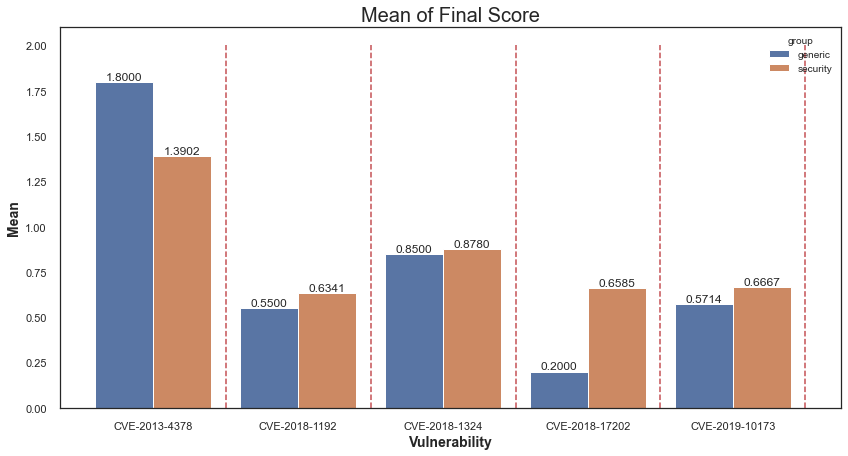

In [24]:
# df_part2_result1 = df_part2_result[['vulnerability','group', 'original_score']]
# df_part2_result1['Metric'] = 'original_score'
# df_part2_result1.rename(columns={'original_score':'Value', 'group':'Group'},inplace=True)
#
# df_part2_result2 = df_part2_result[['vulnerability','group', 'final_score']]
# df_part2_result2['Metric'] = 'final_score'
# df_part2_result2.rename(columns={'final_score':'Value', 'group':'Group'},inplace=True)
# df_part2_result_new = pd.concat([df_part2_result1,df_part2_result2],ignore_index=True)

plt.figure(figsize=(14, 7))
g = sns.barplot(x='vulnerability', y='final_score', hue='group', data=df_part2_result, ci=None)
g.set_title("Mean of Final Score", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha='center')
g.set_xlabel("Vulnerability", fontweight='bold', fontsize=14)
g.set_ylabel("Mean", fontweight='bold', fontsize=14)
for container in g.containers:
    g.bar_label(container, fmt='%.4f')
plt.vlines(0.5, 0, 2, 'r', '--')
plt.vlines(1.5, 0, 2, 'r', '--')
plt.vlines(2.5, 0, 2, 'r', '--')
plt.vlines(3.5, 0, 2, 'r', '--')
plt.vlines(4.5, 0, 2, 'r', '--')
# plt.legend(loc=2, prop={'size': 20})
params = {'legend.title_fontsize': 20,
          'legend.fancybox': True,
          'legend.shadow': True,
          'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.show()

In [25]:
df_std = df_part2[['vulnerability','influential_ratio','group']].groupby(['vulnerability','group']).agg('std')
df_std = df_std.where(df_std.influential_ratio != 0).dropna().reset_index()

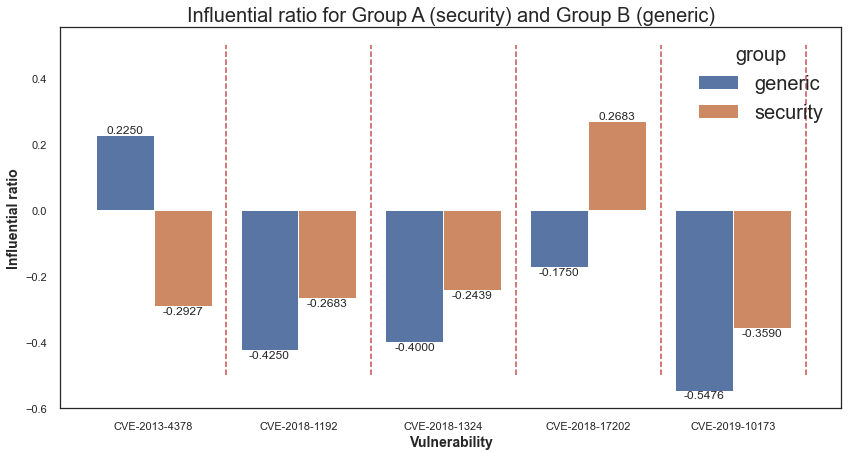

In [26]:
plt.figure(figsize=(14, 7))
g = sns.barplot(x='vulnerability', y='influential_ratio', hue='group', data=df_part2_result, ci=None)
g.set_title("Influential ratio for Group A (security) and Group B (generic)", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha='center')
g.set_xlabel("Vulnerability", fontweight='bold', fontsize=14)
g.set_ylabel("Influential ratio", fontweight='bold', fontsize=14)
for container in g.containers:
    g.bar_label(container, fmt='%.4f')
x_coords = [p.get_x() + 0.5*p.get_width() for p in g.patches]
# y_coords = [p.get_height() for p in g.patches]
# g.errorbar(x=x_coords, y=y_coords, yerr=df_std['influential_ratio'],
#             ecolor='lightgreen', fmt="none", capsize=.3)
plt.vlines(0.5, -0.5, 0.5, 'r', '--')
plt.vlines(1.5, -0.5, 0.5, 'r', '--')
plt.vlines(2.5, -0.5, 0.5, 'r', '--')
plt.vlines(3.5, -0.5, 0.5, 'r', '--')
plt.vlines(4.5, -0.5, 0.5, 'r', '--')
# plt.legend(loc=2, prop={'size': 20})
params = {'legend.title_fontsize': 20,
          'legend.fancybox': True,
          'legend.shadow': True,
          'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.show()

# Past data

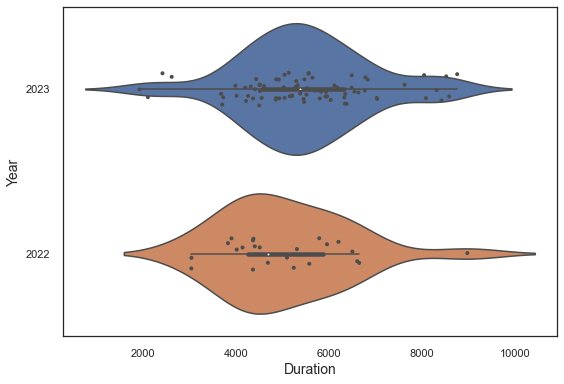

In [28]:
experiment_data = pd.read_excel('2023 - E3- Fixing Vulnerabilities with APR Experiment_February 23, 2023_13.14.xlsx').iloc[1:]
experiment_data_2022 = pd.read_excel('Copy of E2b-Fixing-Vulnerabilities.xlsx').iloc[1:]
experiment_data['Duration (in seconds)'] = pd.to_numeric(experiment_data['Duration (in seconds)'])
experiment_data_2022['Duration (in seconds)'] = pd.to_numeric(experiment_data_2022['Duration (in seconds)'])
experiment_data['Year'] = '2023'
experiment_data_2022['Year'] = '2022'
df_time = pd.concat([experiment_data[['Duration (in seconds)','Year']], experiment_data_2022[['Duration (in seconds)','Year']]])
sns.violinplot(data=df_time[['Duration (in seconds)','Year']], x="Duration (in seconds)", y='Year')

# Add in points to show each observation
sns.stripplot(data=df_time[['Duration (in seconds)','Year']], x="Duration (in seconds)", y='Year',
              size=4, color=".3", linewidth=0)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('images/duration.png')

In [29]:
params = {'legend.title_fontsize': 11,
          'legend.fancybox': True,
          'legend.shadow': True,
          'legend.fontsize': 11,
          'legend.handlelength': 2,
          'legend.loc': 'right'}
plt.rcParams.update(params)

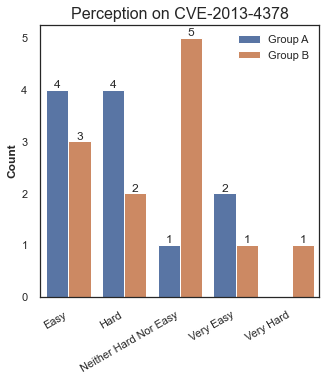

In [30]:
experiment_data_2022_1 = experiment_data_2022[['Difficulty.Marks_5', 'Which Group', 'Duration (in seconds)']].groupby(['Difficulty.Marks_5', 'Which Group']).count()
experiment_data_2022_1 = experiment_data_2022_1.reset_index()
# df_process_understand_a['Group'] = 'Group A'
# df_process_understand_b = df_group_b_data[['Process.Understand', 'Process.Correct', 'GroupA']].groupby('Process.Correct').count()
# df_process_understand_b['Group'] = 'Group B'

# df_process_understand = pd.concat([df_process_understand_a, df_process_understand_b])
# df_process_understand
# sns.set(style="darkgrid")
plt.figure(figsize=(5, 5))
g = sns.barplot(x='Difficulty.Marks_5', y="Duration (in seconds)", hue="Which Group", data=experiment_data_2022_1, ci=None)
g.set_title("Perception on CVE-2013-4378", fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("", fontweight='bold')
g.set_ylabel("Count", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.d')
plt.legend(loc='upper right')


In [ ]:
col_list = ['Which Group', 'Duration (in seconds)']
for i in range(1,8):
    col_list.append(f'Difficulty.Marks_{i}')
experiment_data_2022

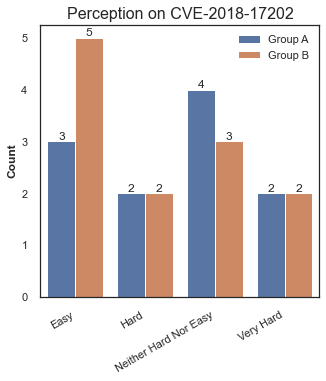

In [31]:
experiment_data_2022_1 = experiment_data_2022[['Difficulty.Marks_6', 'Which Group', 'Duration (in seconds)']].groupby(['Difficulty.Marks_6', 'Which Group']).count()
experiment_data_2022_1 = experiment_data_2022_1.reset_index()
# df_process_understand_a['Group'] = 'Group A'
# df_process_understand_b = df_group_b_data[['Process.Understand', 'Process.Correct', 'GroupA']].groupby('Process.Correct').count()
# df_process_understand_b['Group'] = 'Group B'

# df_process_understand = pd.concat([df_process_understand_a, df_process_understand_b])
# df_process_understand
# sns.set(style="darkgrid")
plt.figure(figsize=(5, 5))
g = sns.barplot(x='Difficulty.Marks_6', y="Duration (in seconds)", hue="Which Group", data=experiment_data_2022_1, ci=None)
g.set_title("Perception on CVE-2018-17202", fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("", fontweight='bold')
g.set_ylabel("Count", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.d')
plt.legend(loc='upper right')
